In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

In [2]:
# from scipy.io import arff
# data, meta = arff.loadarff("mnist_784.arff")
# df = pd.DataFrame(data)
# df.to_csv("mnist_784.csv", index=False)

In [3]:
df = pd.read_csv("mnist_784.csv")
df["class"] = df["class"].apply(lambda x: int(x[2:-1]))


df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [4]:
df_train = df.iloc[:60000]
df_test = df.iloc[60000:]

df_train.shape
df_test.shape

(60000, 785)

(10000, 785)

In [5]:
df_train_two = df_train[df_train["class"] == 2]
df_test_two = df_test[df_test["class"] == 2]

df_train_two.shape
df_test_two.shape

(5958, 785)

(1032, 785)

In [6]:
X_train = df_train_two.iloc[:100, :-1].values.T
X_test = df_test_two.iloc[:1, :-1].values.T

X_train.shape
X_test.shape

(784, 100)

(784, 1)

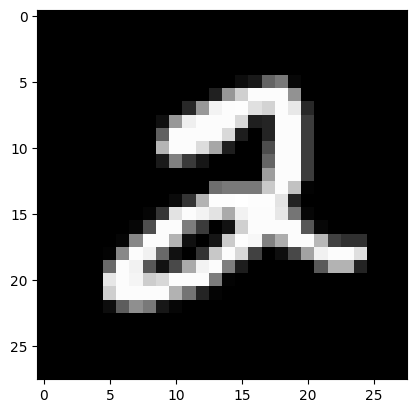

In [7]:
_ = plt.imshow(X_train[:, 0].reshape(28, 28), cmap="gray")

## PCA

In [8]:
X_train_mean = X_train.mean(axis=1, keepdims=True)
X_train = X_train - X_train_mean
X_test = X_test - X_train_mean

In [9]:
n = X_train.shape[1]
C = X_train @ X_train.T / n
C.shape

(784, 784)

In [10]:
eigenvalues, eigenvectors = np.linalg.eigh(C)

sorted_indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

eigenvalues.shape
eigenvectors.shape

(784,)

(784, 784)

In [11]:
def find_k(threshold):
  return np.argmax(np.cumsum(eigenvalues) / sum(eigenvalues) >= threshold) + 1


for t in [.2, .5, .8, .95, 1]:
  print(f't={t*100}%, k={find_k(t)}')

t=20.0%, k=2
t=50.0%, k=6
t=80.0%, k=22
t=95.0%, k=53
t=100%, k=99


In [12]:
k = find_k(.95)
W = eigenvectors[:, :k]
W.shape

(784, 53)

In [13]:
coefficients = X_test.T @ W
coefficients.shape

(1, 53)

In [14]:
X_test_ = (coefficients @ W.T).T
X_test_.shape

(784, 1)

In [15]:
np.sqrt(np.mean((X_test - X_test_) ** 2))  # rmse

np.float64(34.647313373837505)

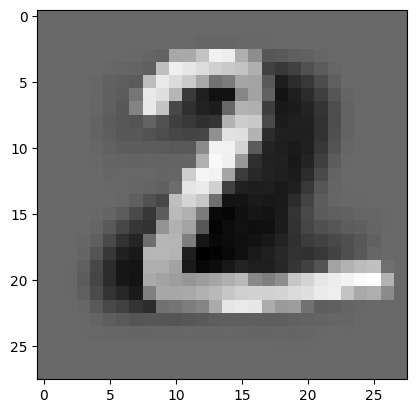

In [16]:
_ = plt.imshow(X_test.reshape(28, 28), cmap="gray")

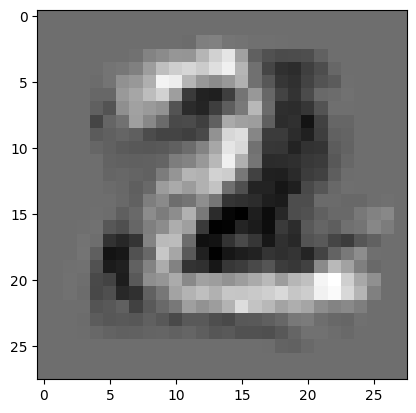

In [ ]:
_ = plt.imshow(X_test_.reshape(28, 28), cmap="gray")

k=2, rmse=65.01864406659871
k=6, rmse=61.31819056095393
k=22, rmse=46.026883720369455
k=53, rmse=34.647313373837505
k=99, rmse=30.641900462995615
k=770, rmse=5.364630041342523


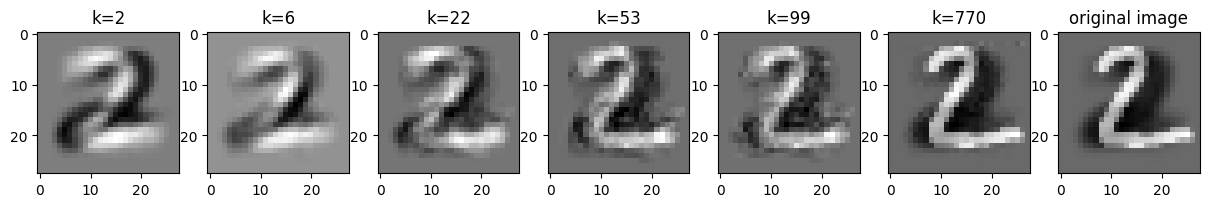

In [18]:
def plot_for_k(k_values):
  plt.figure(figsize=(15, 3))
  cols = len(k_values) + 1
  for idx, k in enumerate(k_values, start=1):
    W = eigenvectors[:, :k]

    coefficients = X_test.T @ W
    X_test_ = (coefficients @ W.T).T

    print(f"k={k}, rmse={np.sqrt(np.mean((X_test-X_test_)**2))}")  # rmse
    _ = plt.subplot(1, cols, idx)
    _ = plt.imshow(X_test_.reshape(28, 28), cmap='gray')
    _ = plt.title(f'k={k}')

  _ = plt.subplot(1, cols, cols)
  _ = plt.imshow(X_test.reshape(28, 28), cmap='gray')
  _ = plt.title('original image')


k_values = [find_k(t) for t in [0.2, 0.5, 0.8, 0.95, 1]] + [770]
plot_for_k(k_values)

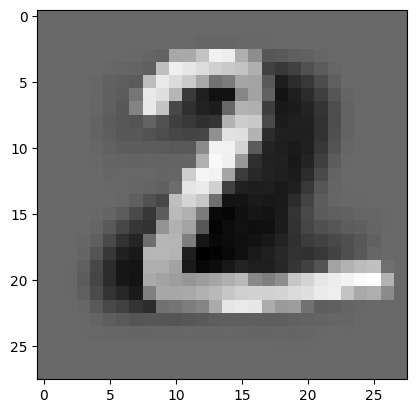

In [21]:
_ = plt.imshow(X_test.reshape(28, 28), cmap='gray')